In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime,timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

2016-08-23 00:00:00


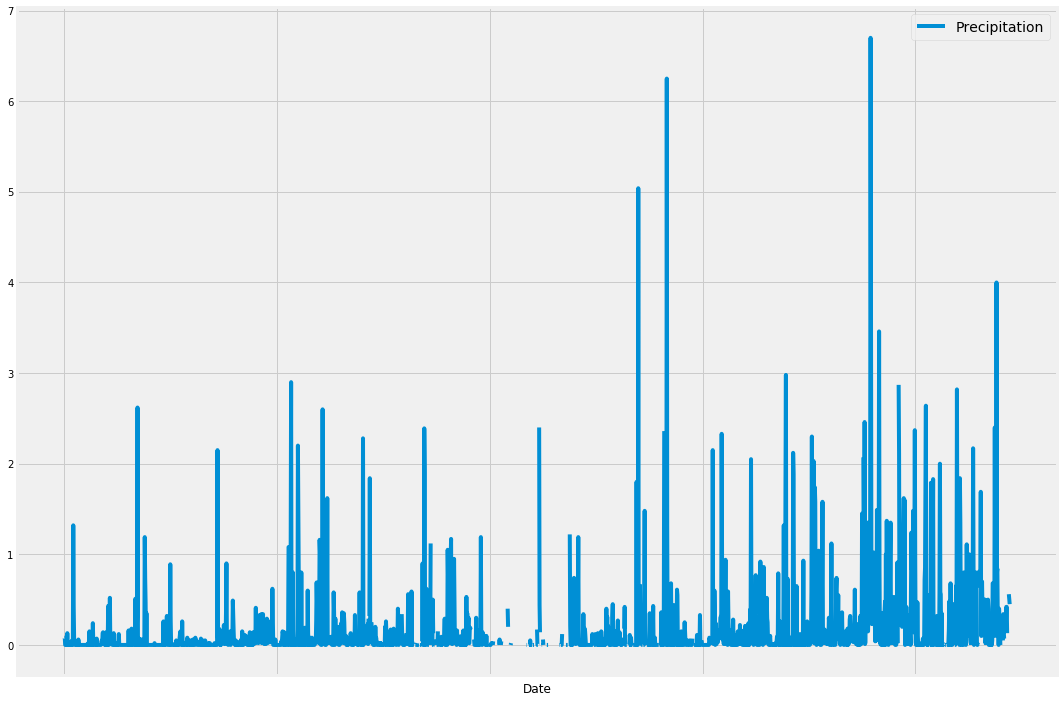

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


    
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# table=session.query(Measurement)
#     print(table)
    
start_time = datetime(2017,8,23)
last_12months = start_time - timedelta(days=365)
print(last_12months)
prcp_df= session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > last_12months).all()

df=pd.DataFrame(prcp_df).set_index('date', drop=True)
df.head()
df.plot(kind="line",linewidth=4,figsize=(15,10))

plt.style.use('fivethirtyeight')
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(["Precipitation"])
plt.tight_layout()
# plt.savefig("figures/PCRP.png")   
plt.show()

    

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?
station_df=session.query(Station.station).count()
station_df

9

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# table=session.query(Measurement)
# print(table)
act_station=session.query(Measurement.station,func.count(Measurement.prcp)).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
act_station

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
act_station_min=session.query(Measurement.station,func.min(Measurement.tobs)).group_by(Measurement.station).order_by(func.min(Measurement.tobs).asc()).all()
act_station_avg=session.query(Measurement.station,func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(func.avg(Measurement.tobs).asc()).all()
act_station_max=session.query(Measurement.station,func.max(Measurement.tobs)).group_by(Measurement.station).order_by(func.max(Measurement.tobs).asc()).all()

act_station_min
act_station_avg
act_station_max
act_station=session.query(Measurement.station,func.count(Measurement.prcp)).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).limit(1).all()
act_station

[('USC00519281', 2772)]

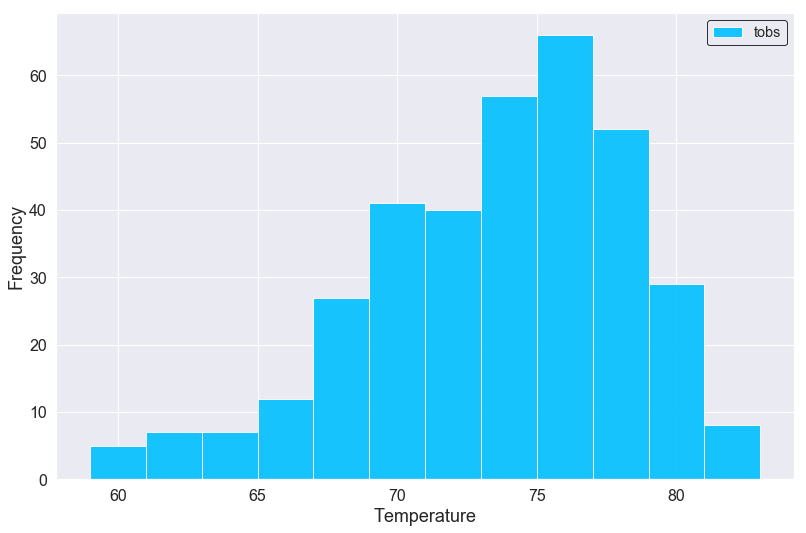

In [54]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# start_time = datetime(2017,8,23)
# last_12months = start_time - timedelta(days=365)
months_act_station=session.query(Measurement.station, Measurement.date, Measurement.tobs).group_by(Measurement.date).filter(Measurement.date >last_12months).filter(Measurement.station=='USC00519281').all()
months_act_station

df1=pd.DataFrame(months_act_station).set_index('station', drop=True)
df1.head(10)

sns.set()

x = df1['tobs']
num_bins = 12
 
plt.figure(figsize=[12.8, 8])
plt.hist(x, num_bins, facecolor='deepskyblue', label='tobs', alpha=0.9)

plt.xlabel('Temperature', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16)
legend = plt.legend(frameon=True, edgecolor='black', fontsize='large')
plt.subplots_adjust(left=0.15)
plt.show()




In [58]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
#     query=[Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
# #     """TMIN, TAVG, and TMAX for a list of dates.
    
# #     Args:
# #         start_date (string): A date string in the format %Y-%m-%d
# #         end_date (string): A date string in the format %Y-%m-%d
        
# #     Returns:
# #         TMIN, TAVE, and TMAX
#     """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [79]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
2017,8,23
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
data = (calc_temps('2016-08-22', '2017-08-23'))
df2 = pd.DataFrame(data=data, columns=[ "t_min", "t_avg", "t_max"])
# df2 = df2.set_index('tmin', drop=True)
#plot2_pd = plot2_pd.drop(columns="station", axis=1)
df2.head()

,t_min,t_avg,t_max
0,58.0,74.599017,87.0


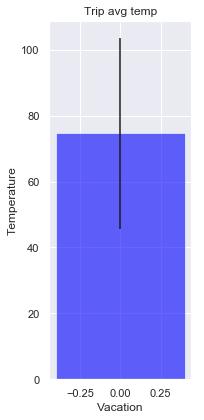

In [99]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
maxe= df2['t_max']
mine=df2['t_min']
yerror=maxe-mine
yerror
avge=df2["t_avg"]
xval = range(len(avge))
plt.figure(figsize=[3, 6])
plt.bar(xval,avge, yerr=yerror, color='blue', alpha=.6)
plt.xlabel("Vacation")
plt.ylabel("Temperature")
plt.title("Trip avg temp")
plt.tight_layout()
    
plt.show()

In [174]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_time = datetime(2017,8,23)
last_12months = start_time - timedelta(days=365)
station_rain = session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.avg(Measurement.prcp)).\
                    filter(Measurement.station == Station.station).\
                    filter(Measurement.date >last_12months).group_by(Station.station).\
                    order_by(func.avg(Measurement.prcp).desc()).all()
station_rain 
# df3 = pd.DataFrame(station_rain)
# stat = []
# for row in station_rain:
#     stat.append(row)      
# stat
df4 = pd.DataFrame(data=stat, columns=[ "Name", "ID", "lat","long","elev","PRCP"]).set_index('Name', drop=True)
df4.head(10)

,ID,lat,long,elev,PRCP
Name,,,,,
"WAIKIKI 717.2, HI US",USC00519397,21.27160,-157.81680,3.0,0.044944
"PEARL CITY, HI US",USC00517948,21.39340,-157.97510,11.9,0.076500
"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,21.33556,-157.71139,19.5,0.121374
"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,21.52130,-157.83740,7.0,0.125720
"KANEOHE 838.1, HI US",USC00513117,21.42340,-157.80150,14.6,0.141404
"WAIHEE 837.5, HI US",USC00519281,21.45167,-157.84889,32.9,0.194416
"MANOA LYON ARBO 785.2, HI US",USC00516128,21.33310,-157.80250,152.4,0.449878


## Optional Challenge Assignment

In [148]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [152]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

def daily_normal(start_date, end_date):
    seel = [func.strftime("%m-%d", Measurement.date),func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*seel).\
    filter(func.strftime("%m-%d", Measurement.date) >= start_date).filter(func.strftime("%m-%d", Measurement.date) <= end_date).group_by(Measurement.date).all()
normal=daily_normal("01-01","02-01")

In [172]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df5 = pd.DataFrame(data=normal, columns=[ "Date", "Min_temp", "Avg_Temp","Max_Temp"]).set_index('Date', drop=True)
df5.head(10)

,Min_temp,Avg_Temp,Max_Temp
Date,,,
01-01,65.0,69.714286,75.0
01-02,61.0,67.000000,75.0
01-03,67.0,74.000000,77.0
01-04,72.0,75.000000,76.0
01-05,73.0,74.500000,76.0
01-06,71.0,73.333333,76.0
01-07,68.0,70.428571,74.0
01-08,63.0,65.571429,73.0
01-09,67.0,68.571429,70.0


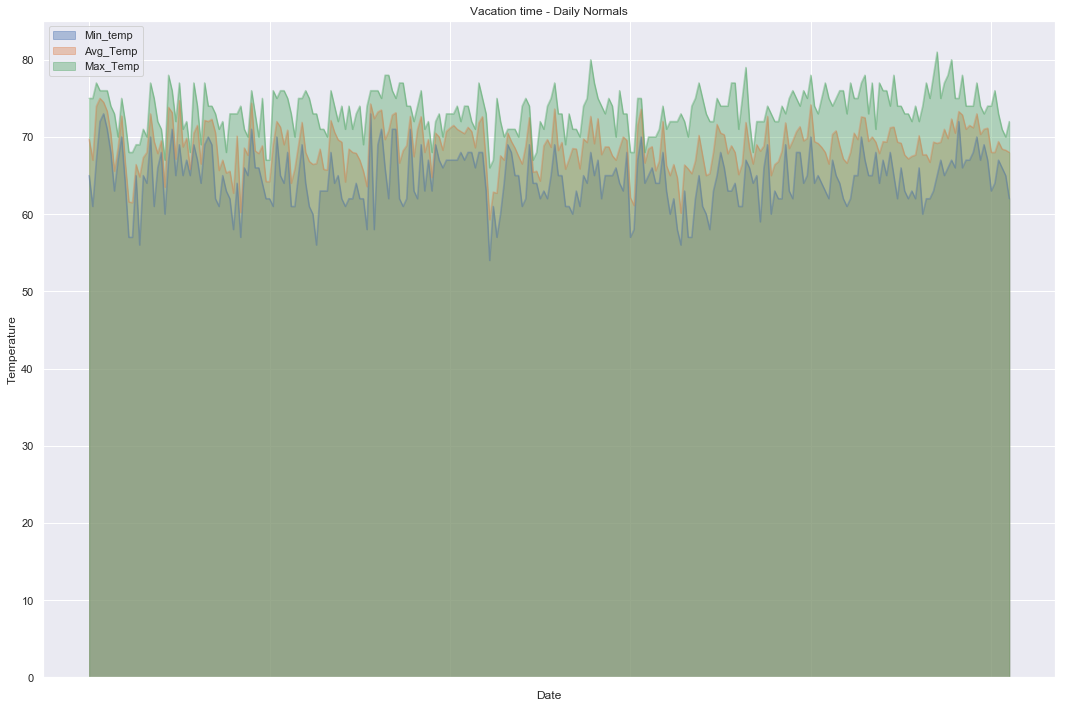

In [171]:
# Plot the daily normals as an area plot with `stacked=False`
df5.plot.area(stacked=False,figsize=(15,10),alpha=0.40)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Vacation time - Daily Normals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()